In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import librosa
from librosa import display
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
from tqdm import tqdm
import os
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

<ipython-input-2-9f8a774bd5db>:13: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(y=audio, sr=sr, x_axis='time', ax=axs[i])
<ipython-input-2-9f8a774bd5db>:13: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(y=audio, sr=sr, x_axis='time', ax=axs[i])


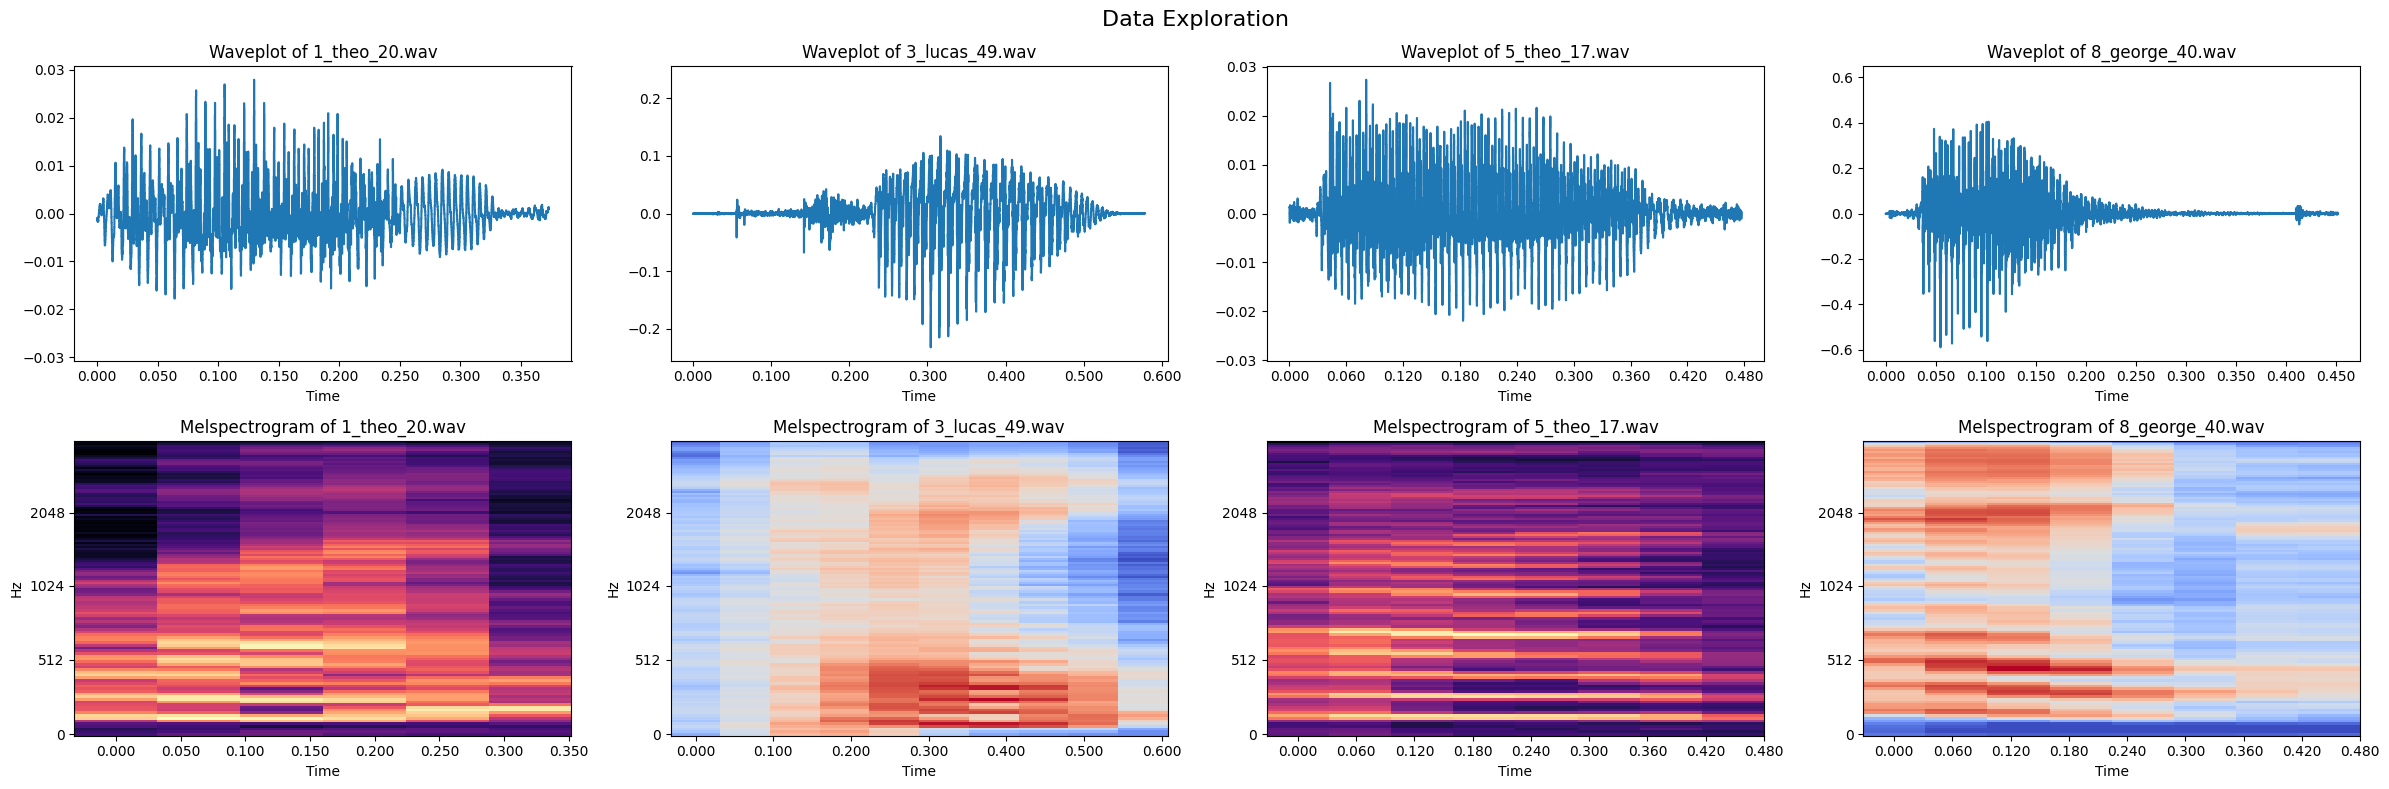

In [ ]:
visualize_digits = [1, 3, 5, 8]

description = pd.read_csv('/content/drive/MyDrive/dig csv/train.csv')
fig, axs = plt.subplots(nrows=2, ncols=(len(visualize_digits)))
axs = axs.flatten()
fig.suptitle('Data Exploration', fontsize=16)
fig.set_size_inches(24, 8)
for i, digit in enumerate(visualize_digits):
    # Select random file for selected digit
    rand_file = np.random.choice(description[description['label'] == digit]['file_name'])
    # Load audio and plot waveform and melspectrogram
    audio, sr = librosa.load(os.path.join('/content/drive/MyDrive/dig kagg/rec', rand_file), sr=None)
    librosa.display.waveshow(y=audio, sr=sr, x_axis='time', ax=axs[i])
    axs[i].set(title=f'Waveplot of {rand_file}')
    mels_db = librosa.power_to_db(S=librosa.feature.melspectrogram(y=audio, sr=sr), ref=1.0)
    librosa.display.specshow(data=mels_db, sr=sr, x_axis='time', y_axis='mel', ax=axs[i+len(visualize_digits)])
    axs[i+len(visualize_digits)].set(title=f'Melspectrogram of {rand_file}')
plt.tight_layout()
plt.show()

In [ ]:
feature_list = []
label_list = []

print('Preparing feature dataset and labels.')
for file in tqdm(os.listdir('/content/drive/MyDrive/dig kagg/rec')):
    if not file.endswith('.wav'):
        continue

    audio_path = os.path.join('/content/drive/MyDrive/dig kagg/rec', file)
    audio, sr = librosa.load(path=audio_path, sr=None)
    audio = librosa.effects.time_stretch(y=audio, rate=len(audio)/sr)

    mels = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=512)
    mels_db = librosa.power_to_db(S=mels, ref=1.0)
    feature_list.append(mels_db.reshape((128, 16, 1)))
    label_list.append(file[0])

features = np.array(feature_list)
labels = np.array(label_list)

Preparing feature dataset and labels.


100%|██████████| 3076/3076 [02:26<00:00, 21.06it/s]


In [ ]:
TEST_SIZE = 0.3
BATCH_SIZE = 64
EPOCHS = 10
# Flatten the spectrogram data
X_flat = features.reshape(features.shape[0], -1)

In [ ]:
# Initialize a list to store accuracies at each iteration
epoch_accuracies = []

for epoch in range(EPOCHS):
    # Train the model
    svm_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svm_model.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store the accuracy for this iteration
    epoch_accuracies.append(accuracy)

    print(f'EPOCH: {epoch + 1}/{EPOCHS} - Test Accuracy: {accuracy:.2%}')

# Print classification report
y_pred = svm_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print support vector count and shape
print("\nSupport Vectors:")
print(f"Number of support vectors: {svm_model.n_support_}")
print(f"Indices of support vectors: {svm_model.support_}")

# Plot the training history
plt.plot(range(1, EPOCHS + 1), epoch_accuracies)
plt.title('SVM Accuracy for Different Iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Split dataset to train and test data
X_train, X_test, y_train, y_test = train_test_split(X_flat, labels, test_size=TEST_SIZE, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2%}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))




Test Accuracy: 96.10%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        82
           1       0.96      0.97      0.96        93
           2       0.99      0.98      0.98        87
           3       0.90      0.96      0.93       102
           4       0.96      1.00      0.98        95
           5       0.96      0.96      0.96        82
           6       0.93      0.95      0.94        96
           7       0.99      0.95      0.97       107
           8       0.98      0.95      0.96        95
           9       0.97      0.89      0.93        84

    accuracy                           0.96       923
   macro avg       0.96      0.96      0.96       923
weighted avg       0.96      0.96      0.96       923



In [ ]:
# Initialize a list to store accuracies at each iteration
epoch_accuracies = []

for epoch in range(EPOCHS):
    # Train the model
    rf_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store the accuracy for this iteration
    epoch_accuracies.append(accuracy)

    print(f'EPOCH: {epoch + 1}/{EPOCHS} - Test Accuracy: {accuracy:.2%}')

EPOCH: 1/10 - Test Accuracy: 96.10%
EPOCH: 2/10 - Test Accuracy: 96.10%
EPOCH: 3/10 - Test Accuracy: 96.10%
EPOCH: 4/10 - Test Accuracy: 96.10%
EPOCH: 5/10 - Test Accuracy: 96.10%
EPOCH: 6/10 - Test Accuracy: 96.10%
EPOCH: 7/10 - Test Accuracy: 96.10%
EPOCH: 8/10 - Test Accuracy: 96.10%
EPOCH: 9/10 - Test Accuracy: 96.10%
EPOCH: 10/10 - Test Accuracy: 96.10%


In [ ]:
# Print classification report
y_pred = rf_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        82
           1       0.96      0.97      0.96        93
           2       0.99      0.98      0.98        87
           3       0.90      0.96      0.93       102
           4       0.96      1.00      0.98        95
           5       0.96      0.96      0.96        82
           6       0.93      0.95      0.94        96
           7       0.99      0.95      0.97       107
           8       0.98      0.95      0.96        95
           9       0.97      0.89      0.93        84

    accuracy                           0.96       923
   macro avg       0.96      0.96      0.96       923
weighted avg       0.96      0.96      0.96       923



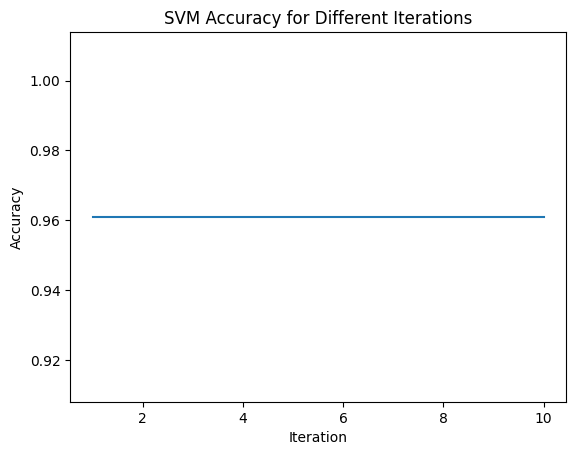

In [ ]:
# Plot the training history
plt.plot(range(1, EPOCHS + 1), epoch_accuracies)
plt.title('SVM Accuracy for Different Iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Split dataset to train and test data
X_train, X_test, y_train, y_test = train_test_split(X_flat, labels, test_size=TEST_SIZE, random_state=42)

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2%}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
